<a href="https://colab.research.google.com/github/jash-ai/PYTHON/blob/main/DecisionTreeClassificationDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/tutorial/decision-tree-classification-python


Decision Tree Classification in Python Tutorial

Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


Loading Data

In [13]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [14]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
##remove the first index columns all rows, index 0
#https://blog.enterprisedna.co/pandas-drop-index/#:~:text=In%20pandas%2C%20you%20can%20use,drop%20and%20reset%20the%20index.&text=the%20below%20example%3A-,What%20is%20this%3F,labels%20from%20rows%20or%20columns.

pima.drop(0, axis=0, inplace=True)

In [18]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [19]:
#split dataset in features and target variable
##target variable column = label
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

- The code is preparing data for a machine learning model by splitting it into features and target variable.
• feature_cols is a list of column names that will be used as features for the model.
• X = pima[feature_cols] selects the columns in feature_cols from the pima dataframe to be the features.
• y = pima.label assigns the 'label' column from the pima dataframe to be the target variable.

Splitting Data

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [20]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


- The code is using the train_test_split function from the sklearn.model_selection module.
• X and y are the feature and target variables of the dataset respectively.
• The function splits the dataset into training and testing sets.
• test_size=0.3 means that 30% of the data will be used for testing and the remaining 70% for training.
• random_state=1 is used for reproducing the same split every time the code is run.
• X_train and y_train are the feature and target variables for the training set.
• X_test and y_test are the feature and target variables for the testing set.

Building Decision Tree Model

Let's create a decision tree model using Scikit-learn.

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


- The code begins by importing the DecisionTreeClassifier from the sklearn library.
• A Decision Tree classifier object 'clf' is created.
• The classifier is then trained using the 'fit' method on the training data 'X_train' and 'y_train'.
• The trained classifier is used to make predictions on the test data 'X_test'.
• The predictions are stored in the variable 'y_pred'.

Evaluating the Model

Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.70995670995671


We got a classification rate of 70.99%, which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.

Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting the tree, you also need to install graphviz and pydotplus.

pip install graphviz

pip install pydotplus

The export_graphviz function converts the decision tree classifier into a dot file, and pydotplus converts this dot file to png or displayable form on Jupyter.

In [23]:
pip install graphviz

In [24]:
pip install pydotplus

In [26]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

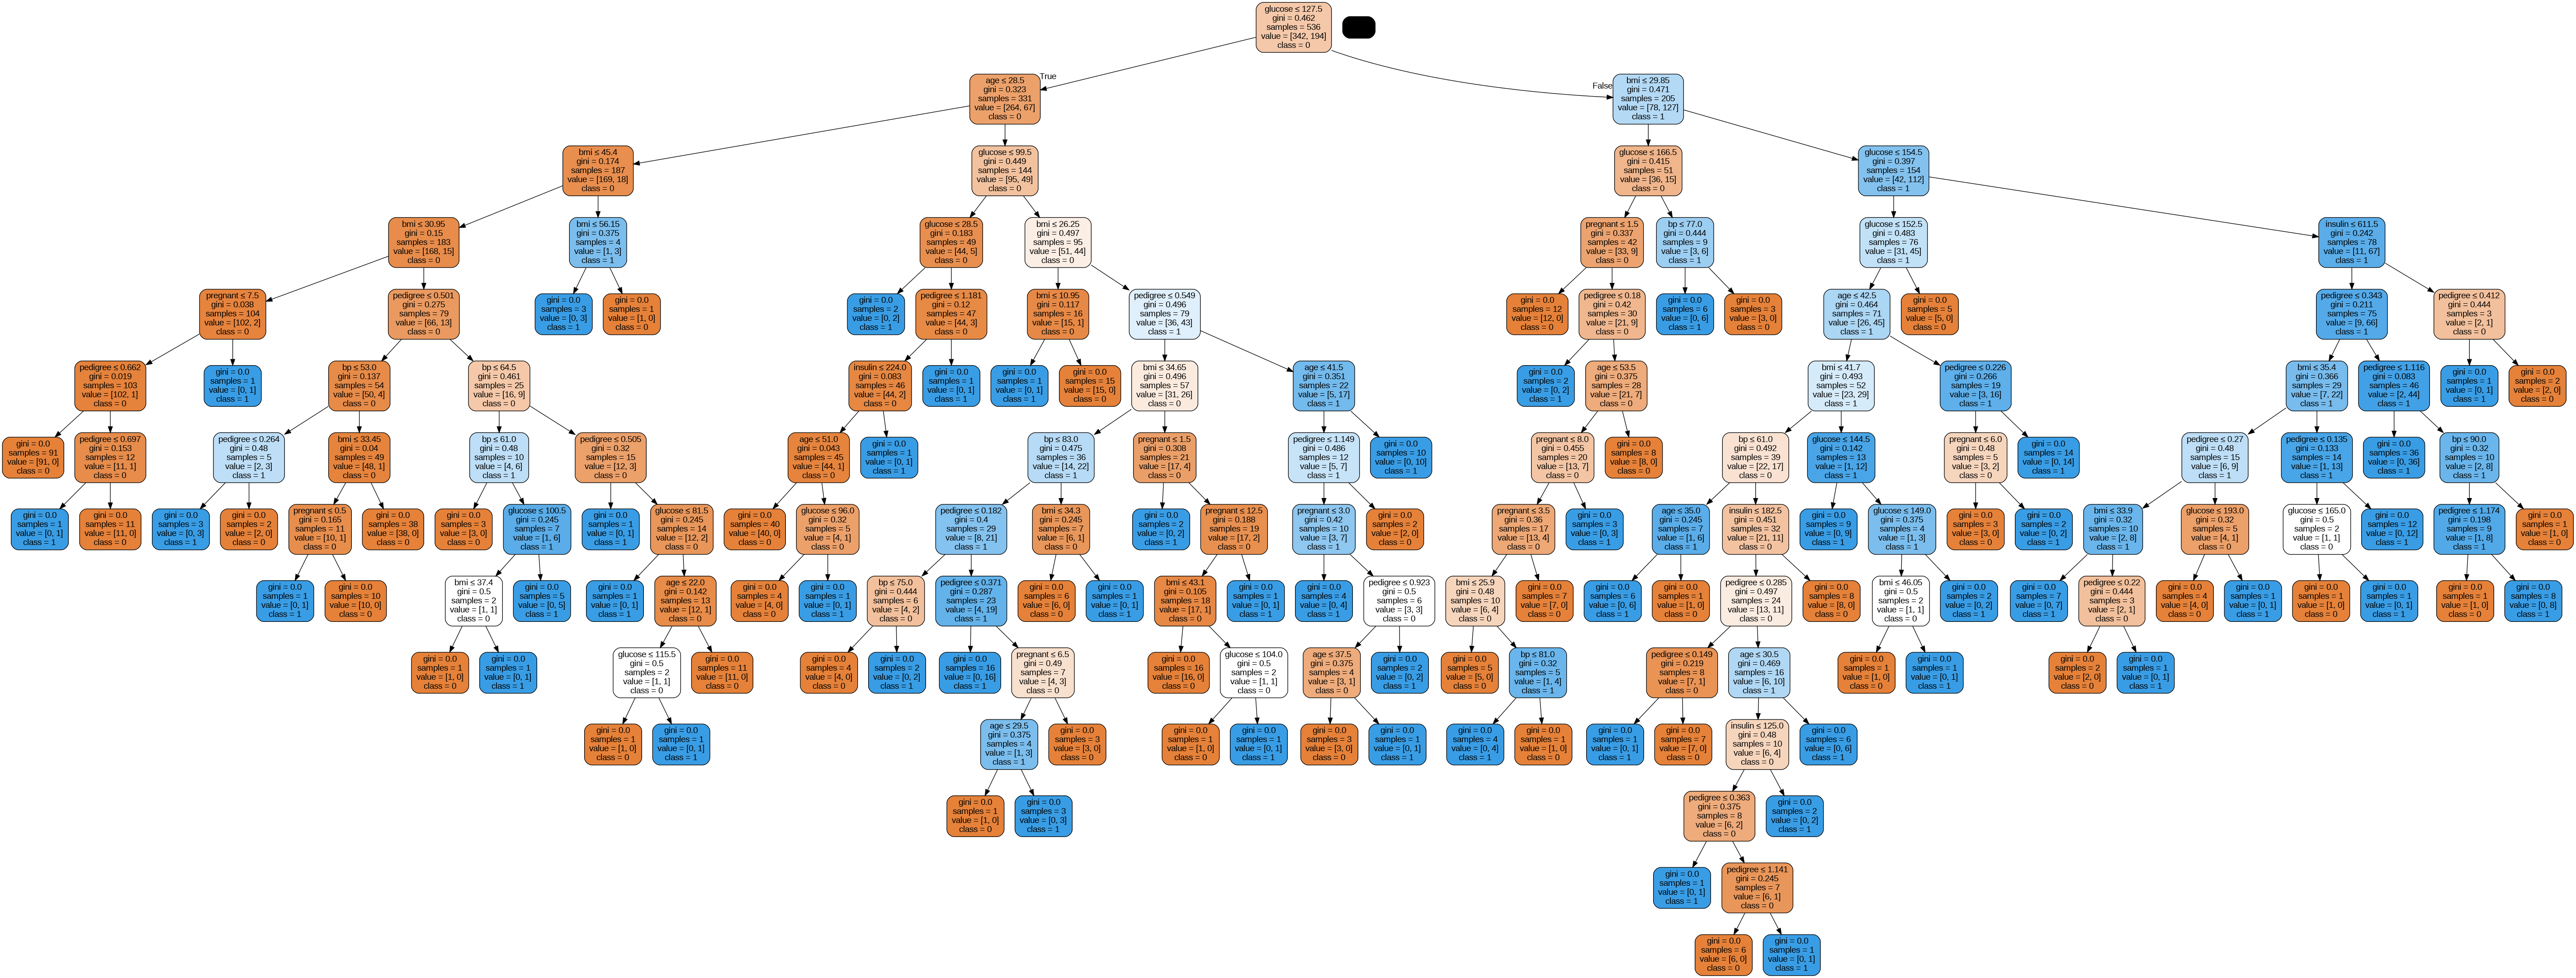

In [27]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

- The code starts by importing necessary modules: export_graphviz from sklearn.tree, StringIO from sklearn.externals.six, Image from IPython.display, and pydotplus.
• dot_data = StringIO() initializes an instance of StringIO, which is a type of file object for strings.
• export_graphviz() is called to convert the decision tree classifier (clf) into dot file format.
• The filled, rounded, special_characters parameters are set to True for better visualization, and feature_names and class_names are set for clarity.
• graph_from_dot_data(dot_data.getvalue()) is used to convert the dot data into a graph.
• graph.write_png('diabetes.png') writes the graph to a PNG file named 'diabetes.png'.
• Image(graph.create_png()) is used to display the created PNG image in the Jupyter notebook.

In the decision tree chart, each internal node has a decision rule that splits the data. Gini, referred to as Gini ratio, measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

Optimizing Decision Tree Performance

criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.


splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).


In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


- The code begins by importing the DecisionTreeClassifier from the sklearn library.
• A Decision Tree classifier object 'clf' is created with 'entropy' as the criterion and a maximum depth of 3.
• The classifier 'clf' is then trained using the 'fit' method on the training data 'X_train' and 'y_train'.
• The trained classifier is used to predict the responses for the test dataset 'X_test', stored in 'y_pred'.
• The accuracy of the model is calculated by comparing the predicted responses 'y_pred' with the actual responses 'y_test'.
• Finally, the accuracy of the model is printed to the console.

Well, the classification rate decreased to 68.03%, which is less accuracy than the previous model.

Visualizing Decision Trees

Let's make our decision tree a little easier to understand using the following code:

In [29]:
#from six import StringIO from IPython.display import Image
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,
#                filled=True, rounded=True,
#                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('diabetes.png')
#Image(graph.create_png())

SyntaxError: ignored

Here, we've completed the following steps:

Imported the required libraries.
Created a StringIO object called dot_data to hold the text representation of the decision tree.
Exported the decision tree to the dot format using the export_graphviz function and write the output to the dot_data buffer.
Created a pydotplus graph object from the dot format representation of the decision tree stored in the dot_data buffer.
Written the generated graph to a PNG file named "diabetes.png".
Displayed the generated PNG image of the decision tree using the Image object from the IPython.display module.

As you can see, this pruned model is less complex, more explainable, and easier to understand than the previous decision tree model plot.

Decision Tree Pros
Decision trees are easy to interpret and visualize.
It can easily capture Non-linear patterns.
It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
It can be used for feature engineering such as predicting missing values, suitable for variable selection.
The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

Decision Tree Cons
Sensitive to noisy data. It can overfit noisy data.
The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.